<a href="https://colab.research.google.com/github/yugeenzsm/AI-ML-/blob/main/Workshop5_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
!gdown 1l6TJeUz4_H-q2x0MSEqjVjzw-Ye_f9tn

Downloading...
From: https://drive.google.com/uc?id=1l6TJeUz4_H-q2x0MSEqjVjzw-Ye_f9tn
To: /content/FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 23.3MB/s]


In [3]:
!unzip FruitinAmazon.zip

Archive:  FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train/acai/ima

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random

# # Load a sample dataset (MNIST for simplicity)
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Normalize and reshape data
# x_train = x_train.astype("float32") / 255.0
# x_test = x_test.astype("float32") / 255.0
# x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
# x_test = np.expand_dims(x_test, axis=-1)

# # Define a simple CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation="relu"),
#     layers.Dense(10, activation="softmax")  # 10 classes for MNIST digits
# ])

# # Compile the model
# model.compile(
#     optimizer="adam",
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# # Train the model
# model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# # Evaluate the model
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f"Test accuracy: {test_acc:.4f}")

# # Make predictions
# predictions = model.predict(x_test[:5])
# predicted_labels = np.argmax(predictions, axis=1)
# print("Predicted labels:", predicted_labels)
# print("Actual labels: ", y_test[:5])


In [5]:
# Define dataset path
train_dir = "/content/FruitinAmazon/train"
test_dir = "/content/FruitinAmazon/test"

# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [6]:
os.listdir(train_dir)

['pupunha', 'cupuacu', 'graviola', 'tucuma', 'guarana', 'acai']

In [7]:
def visualise(train_dir):

  class_dirs = []
  for folder in os.listdir(train_dir):
    class_dirs.append(folder)

  images = []
  labels = []

  for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    image_files = []
    for image in os.listdir(class_path):
      image_files.append(image)

    random_image_file = random.choice(image_files)
    image_path = os.path.join(class_path, random_image_file)

    images.append(plt.imread(image_path))
    labels.append(class_dir)

  fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize = (12, 6))

  for i, (image, label) in enumerate(zip(images, labels)):
    row = i // (len(class_dirs) // 2)
    col = i % (len(class_dirs) // 2)

    axes[row, col].imshow(image)
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

  plt.show()

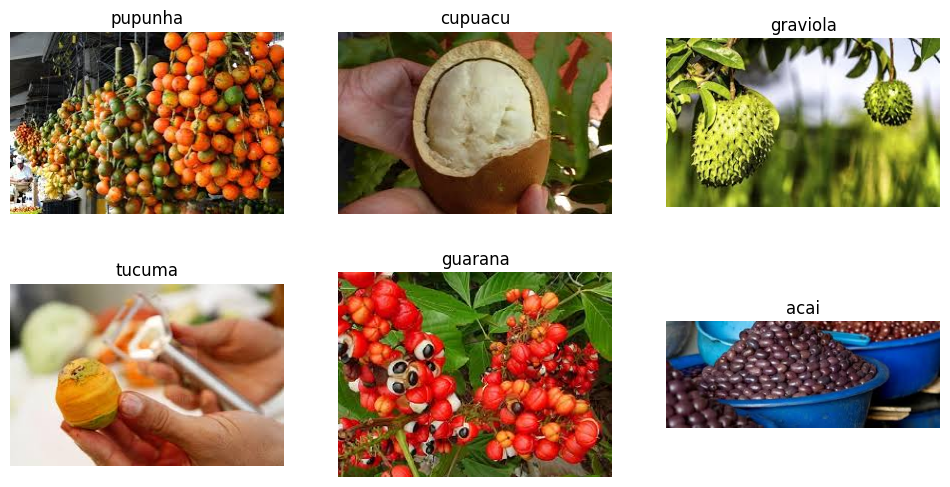

In [8]:
visualise(train_dir)


In [9]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='int',   # Labels will be integer encoded
    image_size=(img_height, img_width),  # Resize images to the specified size
    interpolation='nearest',  # Interpolation method
    batch_size=batch_size,  # Batch size for training
    shuffle=True,  # Shuffle the dataset
    validation_split=validation_split,  # Split the dataset for validation
    subset='training',  # Specify the subset as training data
    seed=123  # Set the seed for reproducibility
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='int',   # Labels will be integer encoded
    image_size=(img_height, img_width),  # Resize images to the specified size
    interpolation='nearest',  # Interpolation method
    batch_size=batch_size,  # Batch size for validation
    shuffle=False,  # Don't shuffle validation data
    validation_split=validation_split,  # Split the dataset for validation
    subset='validation',  # Specify the subset as validation data
    seed=123  # Set the seed for reproducibility
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


In [60]:
# Define a simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")# 10 classes for MNIST digits
])


In [61]:
model.summary

<bound method Model.summary of <Sequential name=sequential_9, built=True>>

# Compile the Model

In [62]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
]

history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - accuracy: 0.0729 - loss: 2.6613 - val_accuracy: 0.6111 - val_loss: 1.5834
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step - accuracy: 0.1584 - loss: 2.3089 - val_accuracy: 0.2778 - val_loss: 1.7180
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - accuracy: 0.2973 - loss: 1.9246 - val_accuracy: 0.1667 - val_loss: 1.8506
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step - accuracy: 0.3594 - loss: 1.8053 - val_accuracy: 0.1667 - val_loss: 1.7771
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3876 - loss: 1.6005 - val_accuracy: 0.6667 - val_loss: 1.2678
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 741ms/step - accuracy: 0.5794 - loss: 1.3914 - val_accuracy: 0.9444 - val_loss: 0.9582
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 731ms/step - accuracy: 0.4852 - loss: 1.3324 - val_accuracy: 0.8333 - val_loss: 1.0994
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 730ms/step - accuracy: 0.7214 - loss: 0.9887 - val_accuracy: 0.7778 - val_

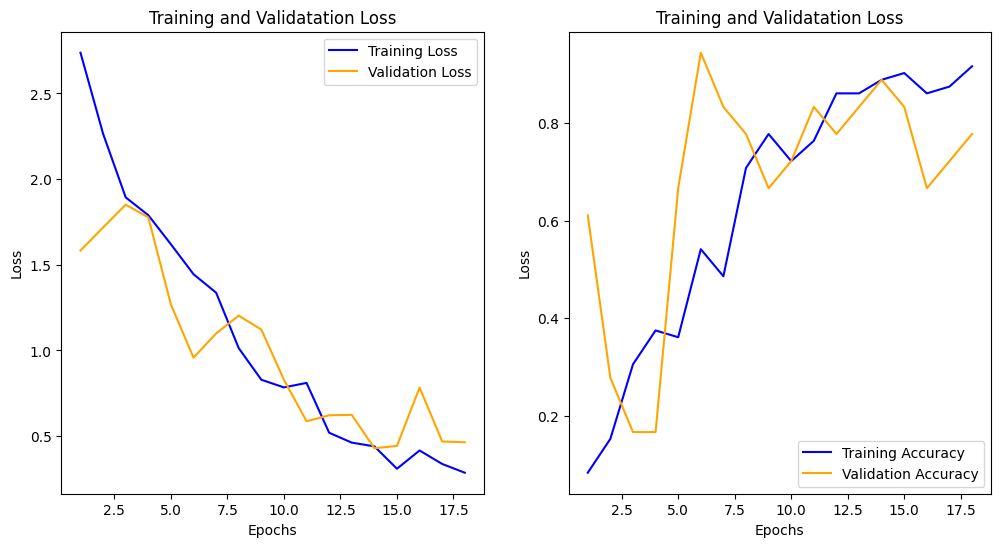

In [64]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validatation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validatation Loss')
plt.legend()

plt.show()


In [65]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7333 - loss: 0.8920
Test Accuracy: 0.7333
